In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from scipy.stats import skew
from scipy import stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression,LassoCV,Lasso,RidgeCV,Ridge
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')

In [2]:
# Loading train and Test set
train = pd.read_csv("house-prices.csv")
test = pd.read_csv("house-prices-test.csv")

# Data Cleaning

In [3]:
# Checking the numbers of samples and features
print("The train data size before dropping PID feature is : {} ".format(train.shape))
print("The test data size before dropping PID feature is : {} ".format(test.shape))

# Saving the 'PID' column
train_PID = train['PID']
test_PID = test['PID']

# Now dropping the 'PID' column since it's unnecessary for the prediction process.
train.drop("PID", axis = 1, inplace = True)
test.drop("PID", axis = 1, inplace = True)

# Checking data size after dropping the 'PID' variable
print("\nThe train data size after dropping PID feature is : {} ".format(train.shape)) 
print("The test data size after dropping PID feature is : {} ".format(test.shape))

The train data size before dropping PID feature is : (2430, 82) 
The test data size before dropping PID feature is : (500, 81) 

The train data size after dropping PID feature is : (2430, 81) 
The test data size after dropping PID feature is : (500, 80) 


In [4]:
# Now dropping the Order column because it's not important
train.drop("Order", axis = 1, inplace = True)
test.drop("Order", axis = 1, inplace = True)

In [5]:
# Checking Categorical Data
train.select_dtypes(include=['object']).columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [6]:
# Checking Categorical Data
test.select_dtypes(include=['object']).columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [7]:
# Checking Discrete Data
train.select_dtypes(include=['int64']).columns

Index(['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [8]:
# Checking Discrete Data
test.select_dtypes(include=['int64']).columns

Index(['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')

In [9]:
# Checking Continuous Data
train.select_dtypes(include=['float64']).columns

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [10]:
# Checking Continuous Data
test.select_dtypes(include=['float64']).columns

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [11]:
#correcting the data types (based on the documentation)
for col in ('Year Built','Year Remod/Add','Lot Area', '1st Flr SF', '2nd Flr SF',
            'Low Qual Fin SF', 'Gr Liv Area','Wood Deck SF','Open Porch SF',
            'Enclosed Porch', '3Ssn Porch', 'Screen Porch','Pool Area', 'Misc Val' ,'Yr Sold'):
    train[col] = train[col].astype(float)
    test[col] = test[col].astype(float)
train['SalePrice'] = train['SalePrice'].astype(float)

In [12]:
for col in ('MS SubClass','Mo Sold'):
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)

In [13]:
# checking missing values
train.isnull().sum()

MS SubClass          0
MS Zoning            0
Lot Frontage       420
Lot Area             0
Street               0
Alley             2267
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        20
Mas Vnr Area        20
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           71
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1186
Garage Type        136
Garage Yr Blt      138
Garage Finish      138
Garage Cars          1
Garage Area          1
Garage Qual

In [14]:
# Finding missing ratio of features in the training dataset
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
missing_data1 = pd.DataFrame({'Missing Ratio' :train_na})
missing_data1

,Missing Ratio
Pool QC,99.506173
Misc Feature,96.296296
Alley,93.292181
Fence,79.876543
Fireplace Qu,48.806584
Lot Frontage,17.283951
Garage Yr Blt,5.679012
Garage Cond,5.679012
Garage Qual,5.679012
Garage Finish,5.679012


Text(0.5, 1.0, 'Percent missing data by feature')

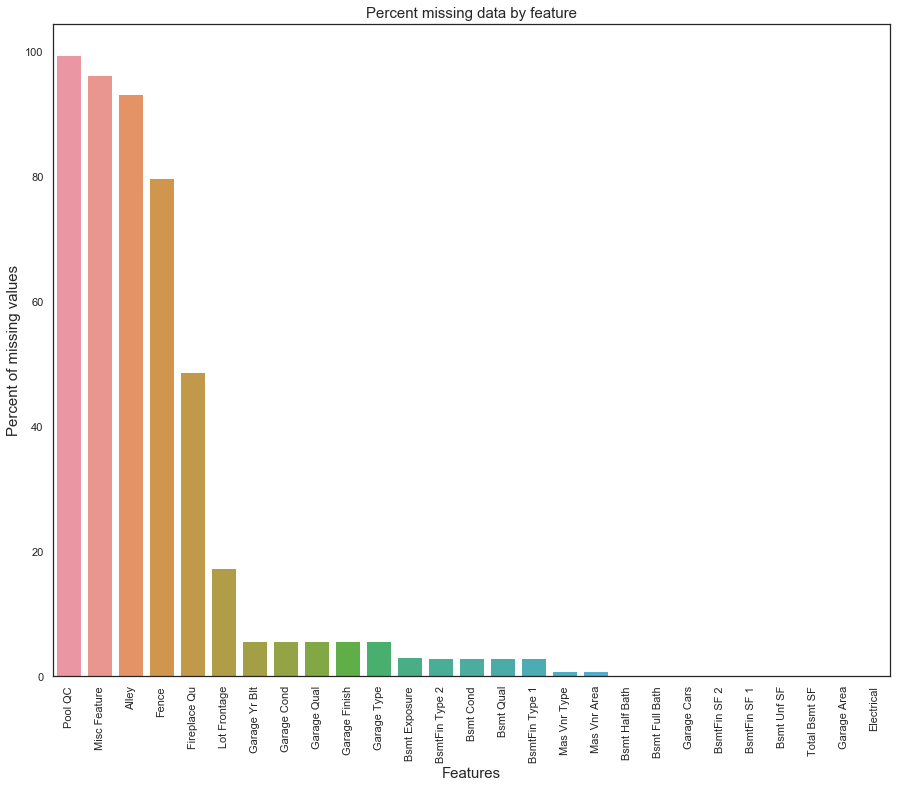

In [15]:
# Plot of percent missing by feature
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [16]:
# missing ratio of features in the test dataset
test_na = (test.isnull().sum() / len(test)) * 100
test_na = test_na.drop(test_na[test_na == 0].index).sort_values(ascending=False)[:30]
missing_data2 = pd.DataFrame({'Missing Ratio' :test_na})
missing_data2

,Missing Ratio
Pool QC,99.8
Misc Feature,96.8
Alley,93.0
Fence,83.4
Fireplace Qu,47.2
Lot Frontage,14.0
Garage Yr Blt,4.2
Garage Type,4.2
Garage Finish,4.2
Garage Qual,4.2


Text(0.5, 1.0, 'Percent missing data by feature')

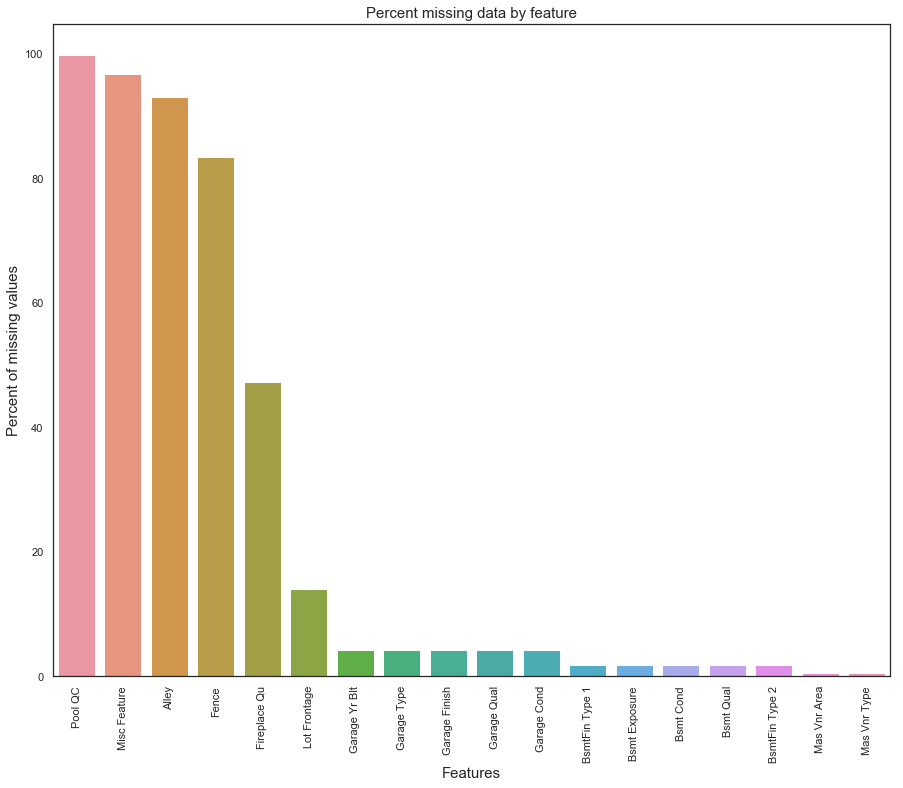

In [17]:
# and the plot
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=test_na.index, y=test_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [18]:
# dropping the four features with the highest missing ratio (more than 50%)
for col in test_na.index[:4]:
    test = test.drop([col], axis=1)

In [19]:
# and in the training dataset
for col in train_na.index[:4]:
    train = train.drop([col], axis=1)

In [20]:
train[train_na.index[4:]].select_dtypes(include=['float64']).columns

Index(['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area', 'Bsmt Half Bath',
       'Bsmt Full Bath', 'Garage Cars', 'BsmtFin SF 2', 'BsmtFin SF 1',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Garage Area'],
      dtype='object')

In [21]:
train[train_na.index[4:]].select_dtypes(include=['int64']).columns

Index([], dtype='object')

In [22]:
train[train_na.index[4:]].select_dtypes(include=['object']).columns

Index(['Fireplace Qu', 'Garage Cond', 'Garage Qual', 'Garage Finish',
       'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2', 'Bsmt Cond',
       'Bsmt Qual', 'BsmtFin Type 1', 'Mas Vnr Type', 'Electrical'],
      dtype='object')

In [23]:
test[test_na.index[4:]].select_dtypes(include=['float64']).columns

Index(['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area'], dtype='object')

In [24]:
test[test_na.index[4:]].select_dtypes(include=['int64']).columns

Index([], dtype='object')

In [25]:
test[test_na.index[4:]].select_dtypes(include=['object']).columns

Index(['Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'BsmtFin Type 1', 'Bsmt Exposure', 'Bsmt Cond',
       'Bsmt Qual', 'BsmtFin Type 2', 'Mas Vnr Type'],
      dtype='object')

In [26]:
# The categorical feature 'Fireplace' has a lot of missing data
# So, I replace them by 'None'

train['Fireplace Qu'].fillna('None',inplace = True)
test['Fireplace Qu'].fillna('None',inplace = True)

In [27]:
# The numeric feature 'Lot Frontage' has a lot of missing values. 
# So I am replacing them by 'local medians' based on similarities among 'Lot Area' and 'Neighborhood'

train['old_lotfrontage'] = train['Lot Frontage']

train['Lot Frontage'] = train.groupby(['Lot Area','Neighborhood'])['Lot Frontage'].transform(lambda x: x.fillna(x.median()))
train['Lot Frontage'] = train.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.median()))

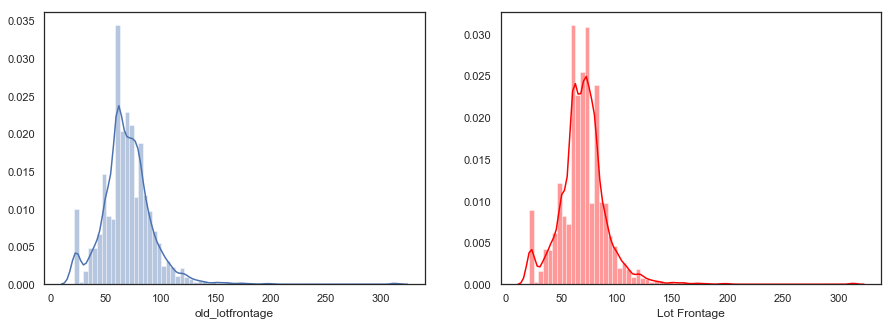

In [28]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ol = sns.distplot(train['old_lotfrontage'].dropna(),ax=ax1,kde=True,bins=70)
lf = sns.distplot(train['Lot Frontage'],ax=ax2,kde=True,bins=70,color='red')

# dropping the old_lotfrontage as we finished the comparison
train.drop('old_lotfrontage',axis=1,inplace=True)

In [29]:
# filling the missing values in numerical features using their medians

for col in ('Garage Yr Blt', 'Mas Vnr Area', 'Bsmt Half Bath',
       'Bsmt Full Bath', 'Garage Cars', 'BsmtFin SF 2', 'BsmtFin SF 1',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Garage Area'):
    train[col].fillna(value=train[col].median(), inplace=True)

In [30]:
# and for the categorical features, we use their modes

for col in ('Garage Cond', 'Garage Qual', 'Garage Finish',
       'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2', 'Bsmt Cond',
       'Bsmt Qual', 'BsmtFin Type 1', 'Mas Vnr Type', 'Electrical'):
    train[col].fillna(value=train[col].mode()[0], inplace=True)

In [31]:
train.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
                 ..
Bsmt Half Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
Kitchen Qual      0
TotRms AbvGrd     0
Functional        0
Fireplaces        0
Fireplace Qu      0
Garage Type       0
Garage Yr Blt     0
Garage Finish     0
Garage Cars       0
Garage Area       0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Wood Deck SF      0


In [32]:
# 'Lot Frontage' still has 3 missing values. I replace them by the overall median

train["Lot Frontage"].fillna(value=train["Lot Frontage"].median(), inplace=True)

In [33]:
train.isnull().sum().sum()

0

 Performing the same task on the test dataset

In [34]:
test['old_lotfrontage'] = test['Lot Frontage']

test['Lot Frontage'] = test.groupby(['Lot Area','Neighborhood'])['Lot Frontage'].transform(lambda x: x.fillna(x.median()))
test['Lot Frontage'] = test.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.median()))

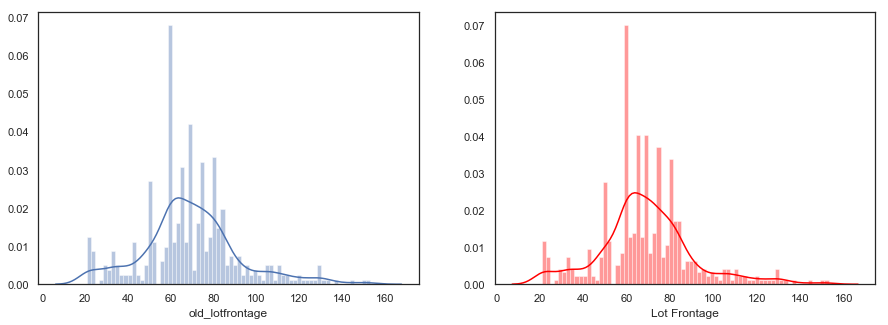

In [35]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ol = sns.distplot(test['old_lotfrontage'].dropna(),ax=ax1,kde=True,bins=70)
lf = sns.distplot(test['Lot Frontage'],ax=ax2,kde=True,bins=70,color='red')

# drop the old_lotfrontage as we finished the comparison
test.drop('old_lotfrontage',axis=1,inplace=True)

In [36]:
for col in ('Garage Yr Blt', 'Mas Vnr Area'):
    test[col].fillna(value=test[col].median(), inplace=True)

In [37]:
for col in ('Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'BsmtFin Type 1', 'Bsmt Exposure', 'Bsmt Cond',
       'Bsmt Qual', 'BsmtFin Type 2', 'Mas Vnr Type'):
     test[col].fillna(value=test[col].mode()[0], inplace=True)

In [38]:
test.isnull().sum().sum()

0

In [39]:
# checking correlations among the features in training dataset
train.corr()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice
Lot Frontage,1.000000,0.383171,0.204712,-0.054926,0.130023,0.088020,0.211349,0.213756,0.054417,0.100921,...,0.358319,0.129663,0.150123,0.012439,0.038523,0.073383,0.185868,0.040942,0.000171,0.353929
Lot Area,0.383171,1.000000,0.083895,-0.038880,0.021072,0.015264,0.113101,0.188775,0.086334,0.018222,...,0.201884,0.151981,0.095408,0.010242,0.017094,0.050361,0.094772,0.071348,-0.026508,0.252444
Overall Qual,0.204712,0.083895,1.000000,-0.092568,0.598777,0.565029,0.421203,0.291197,-0.035202,0.264684,...,0.552550,0.244798,0.291357,-0.141051,0.027349,0.049827,0.036889,0.007069,-0.008484,0.799022
Overall Cond,-0.054926,-0.038880,-0.092568,1.000000,-0.376408,0.051097,-0.135409,-0.058328,0.037944,-0.126605,...,-0.158248,0.032098,-0.055701,0.084867,0.033938,0.049457,-0.031101,0.031773,0.021026,-0.102353
Year Built,0.130023,0.021072,0.598777,-0.376408,1.000000,0.605389,0.319878,0.289011,-0.021807,0.118649,...,0.483419,0.214715,0.177538,-0.366817,0.023090,-0.038088,0.004541,-0.010005,-0.015437,0.559823
Year Remod/Add,0.088020,0.015264,0.565029,0.051097,0.605389,1.000000,0.203648,0.152696,-0.064034,0.164785,...,0.359757,0.205959,0.223676,-0.223141,0.047395,-0.038898,-0.006139,-0.003353,0.023933,0.528243
Mas Vnr Area,0.211349,0.113101,0.421203,-0.135409,0.319878,0.203648,1.000000,0.319836,-0.011545,0.083821,...,0.373286,0.166222,0.147696,-0.118653,0.024156,0.075866,0.010706,0.054827,-0.003658,0.505979
BsmtFin SF 1,0.213756,0.188775,0.291197,-0.058328,0.289011,0.152696,0.319836,1.000000,-0.051421,-0.471461,...,0.307610,0.232247,0.120055,-0.101768,0.040703,0.090066,0.107564,0.101619,0.017181,0.439521
BsmtFin SF 2,0.054417,0.086334,-0.035202,0.037944,-0.021807,-0.064034,-0.011545,-0.051421,1.000000,-0.242363,...,0.009757,0.113234,-0.011137,0.010768,-0.021098,0.067455,0.053779,-0.006475,0.000497,0.013217
Bsmt Unf SF,0.100921,0.018222,0.264684,-0.126605,0.118649,0.164785,0.083821,-0.471461,-0.242363,1.000000,...,0.167255,-0.053869,0.123092,0.005450,0.008217,-0.045546,-0.040233,-0.008931,-0.021405,0.180155


In [40]:
#Dropping features that are highly correlated to each other

covarianceMatrix = train.corr()
listOfFeatures = [i for i in covarianceMatrix]
setOfDroppedFeatures = set() 
for i in range(len(listOfFeatures)) :
    for j in range(i+1,len(listOfFeatures)): #Avoid repetitions 
        feature1=listOfFeatures[i]
        feature2=listOfFeatures[j]
        if abs(covarianceMatrix[feature1][feature2]) > 0.8: #If the correlation between the features is > 0.8
            setOfDroppedFeatures.add(feature1) #Add one of them to the set
#I tried different values of threshold and 0.8 seemed reasonable

train = train.drop(setOfDroppedFeatures, axis=1)

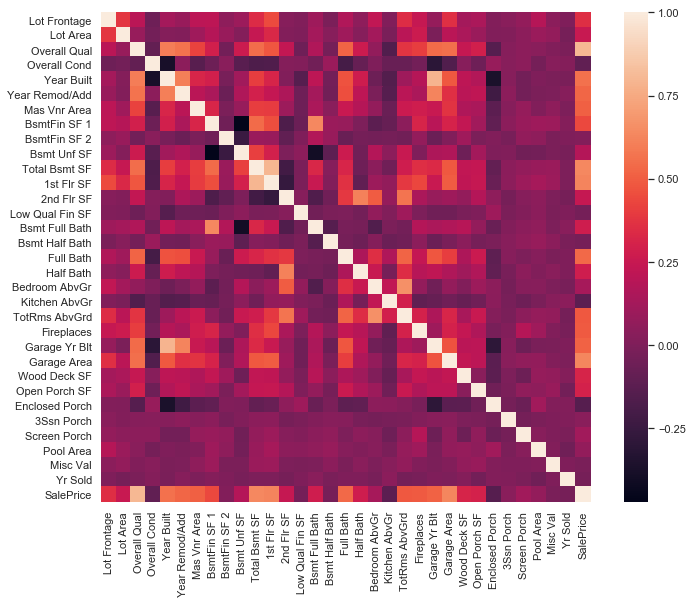

In [41]:
# Correlation Matrix Heatmap
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1., square=True);

In [42]:
print(np.sort(abs(corrmat[['SalePrice']]),axis=None))

[0.01321651 0.01680351 0.02638592 0.02697489 0.02998927 0.03901671
 0.07213842 0.10235269 0.11995438 0.12000855 0.1330066  0.13828228
 0.1801554  0.24501395 0.25244436 0.2782622  0.27982798 0.30121239
 0.31552114 0.35392864 0.43952118 0.48388188 0.49205646 0.5059787
 0.5129216  0.52824313 0.53661566 0.55982329 0.62588208 0.63078532
 0.63518759 0.79902207 1.        ]


In [43]:
# Top 13 (for which correlation is > 0.4) Heatmap 
k = 13 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

In [44]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,Overall Qual
2,Total Bsmt SF
3,Garage Area
4,1st Flr SF
5,Year Built
6,Full Bath
7,Year Remod/Add
8,Garage Yr Blt
9,Mas Vnr Area


I am using the training dataset for feature selection, transformations etc. and performing the same feature selection, transformation etc. on the test dataset for compatibility

In [45]:
# dropping the highly correlated features (obtained from the training dataset) from test dataset

test.drop("Gr Liv Area", axis = 1, inplace = True)
test.drop("Garage Cars", axis = 1, inplace = True)

In [46]:
print(train.shape)
print(test.shape)

(2430, 74)
(500, 73)


Now I am checking and handling outliers based on the 12 most correlated features

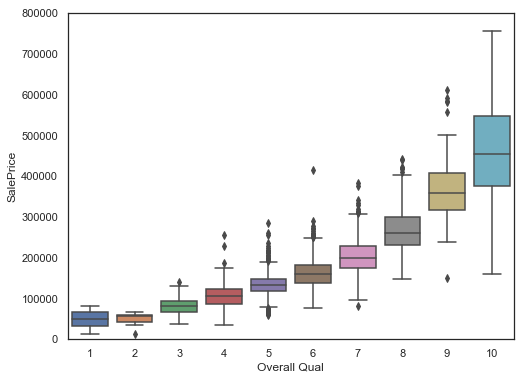

In [47]:
# Overall Quality vs Sale Price
var = 'Overall Qual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

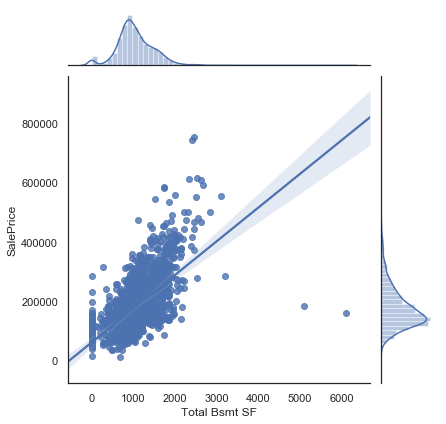

In [48]:
# Total Bsmt SF vs Sale Price
sns.jointplot(x=train['Total Bsmt SF'], y=train['SalePrice'], kind='reg')

In [49]:
# Removing outliers manually
train = train.drop(train[(train['Total Bsmt SF']>4000) 
                         & (train['SalePrice']<200000)].index).reset_index(drop=True)

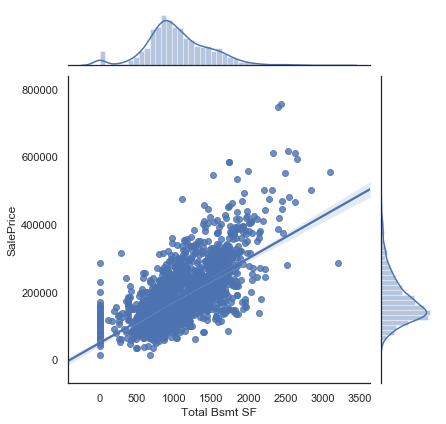

In [50]:
# Total Bsmt SF vs Sale Price
sns.jointplot(x=train['Total Bsmt SF'], y=train['SalePrice'], kind='reg')

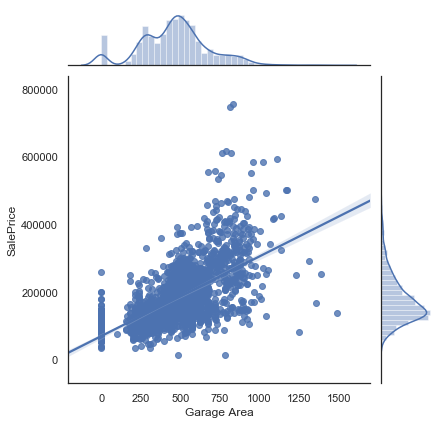

In [51]:
# Garage Area vs Sale Price
sns.jointplot(x=train['Garage Area'], y=train['SalePrice'], kind='reg')

In [52]:
# Removing outliers manually
train = train.drop(train[(train['Garage Area']>500) 
                         & (train['SalePrice']>700000)].index).reset_index(drop=True)

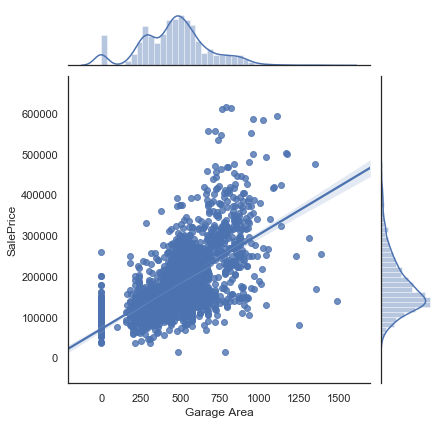

In [53]:
# Garage Area vs Sale Price
sns.jointplot(x=train['Garage Area'], y=train['SalePrice'], kind='reg')

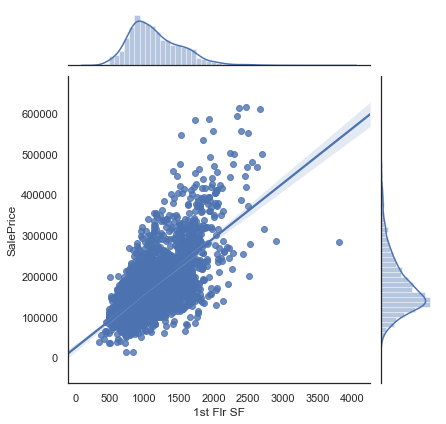

In [54]:
# First Floor Area vs Sale Price
sns.jointplot(x=train['1st Flr SF'], y=train['SalePrice'], kind='reg')

In [55]:
# Removing outliers manually
train = train.drop(train[(train['1st Flr SF']>3000) 
                         & (train['SalePrice']<400000)].index).reset_index(drop=True)

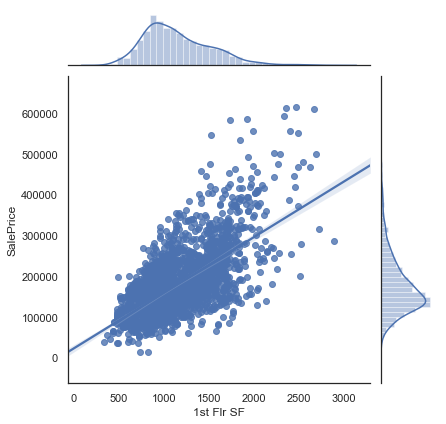

In [56]:
# First Floor Area vs Sale Price
sns.jointplot(x=train['1st Flr SF'], y=train['SalePrice'], kind='reg')

In [57]:
print(train['Year Built'].min())
print(train['Year Built'].max())

1875.0
2010.0


In [58]:
print(test['Year Built'].min())
print(test['Year Built'].max())

1872.0
2010.0


In [59]:
train = train.rename(columns={'Year Built': 'YearBuilt'})
test = test.rename(columns={'Year Built': 'YearBuilt'})

In [60]:
# converting the 'Year Built' feature into categorical. Emphasising more on the present.
train['YearBuilt_Cat'] = 0
train.loc[train.YearBuilt <= 1925,'YearBuilt_Cat'] = 0
train.loc[(train.YearBuilt > 1925) & (train.YearBuilt <= 1975),'YearBuilt_Cat'] = 1
train.loc[(train.YearBuilt > 1975) & (train.YearBuilt <= 2000),'YearBuilt_Cat'] = 2
train.loc[(train.YearBuilt > 2000),'YearBuilt_Cat'] = 3
train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,YearBuilt_Cat
0,60,RL,65.0,8795.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,4,2009.0,WD,Normal,236000.0,2
1,20,RL,75.0,10170.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0.0,0.0,0.0,0.0,6,2006.0,WD,Normal,155000.0,1
2,160,RM,21.0,2001.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,1,2007.0,WD,Normal,75000.0,1
3,20,RL,70.0,10552.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,4,2010.0,WD,Normal,165500.0,1
4,190,RM,60.0,10120.0,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,1,2007.0,WD,Normal,122000.0,0


In [61]:
# and the same for the test dataset
test['YearBuilt_Cat'] = 0
test.loc[test.YearBuilt <= 1925,'YearBuilt_Cat'] = 0
test.loc[(test.YearBuilt > 1925) & (test.YearBuilt <= 1975),'YearBuilt_Cat'] = 1
test.loc[(test.YearBuilt > 1975) & (test.YearBuilt <= 2000),'YearBuilt_Cat'] = 2
test.loc[(test.YearBuilt > 2000),'YearBuilt_Cat'] = 3
test.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,YearBuilt_Cat
0,50,RL,66.0,11275.0,Pave,IR1,HLS,AllPub,Corner,Mod,...,19.0,0.0,0.0,0.0,0.0,3,2007.0,WD,Normal,1
1,20,RL,65.0,9757.0,Pave,Reg,Low,AllPub,Inside,Mod,...,0.0,0.0,92.0,0.0,0.0,10,2009.0,WD,Normal,2
2,60,RL,86.0,11065.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,10,2006.0,New,Partial,3
3,20,RL,70.0,7000.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,4,2007.0,WD,Family,1
4,50,C (all),66.0,8712.0,Pave,Reg,HLS,AllPub,Inside,Mod,...,98.0,0.0,0.0,0.0,0.0,1,2010.0,WD,Abnorml,0


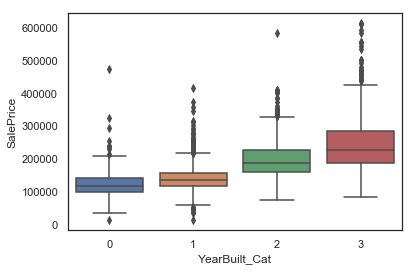

In [62]:
sns.boxplot(x=train['YearBuilt_Cat'], y=train['SalePrice'])

In [63]:
# Removing outliers manually
train = train.drop(train[(train['YearBuilt_Cat']==0) 
                         & (train['SalePrice']>300000)].index).reset_index(drop=True)
train = train.drop(train[(train['YearBuilt_Cat']==1) 
                         & (train['SalePrice']>350000)].index).reset_index(drop=True)
train = train.drop(train[(train['YearBuilt_Cat']==2) 
                         & (train['SalePrice']>400000)].index).reset_index(drop=True)
train = train.drop(train[(train['YearBuilt_Cat']==3) 
                         & (train['SalePrice']>500000)].index).reset_index(drop=True)

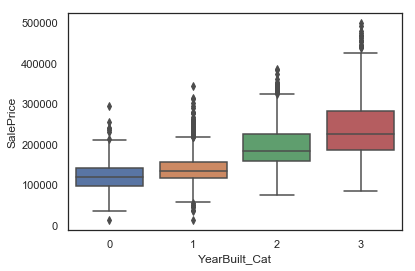

In [64]:
sns.boxplot(x=train['YearBuilt_Cat'], y=train['SalePrice'])

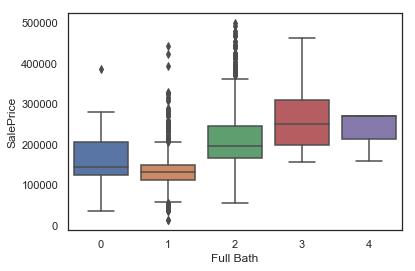

In [65]:
# Full Bath vs Sale Price
sns.boxplot(x=train['Full Bath'], y=train['SalePrice'])

In [66]:
# Removing outliers manually
train = train.drop(train[(train['Full Bath']==0) 
                         & (train['SalePrice']>300000)].index).reset_index(drop=True)
train = train.drop(train[(train['Full Bath']==1) 
                         & (train['SalePrice']>350000)].index).reset_index(drop=True)
train = train.drop(train[(train['Full Bath']==1) 
                         & (train['SalePrice']<70000)].index).reset_index(drop=True)
train = train.drop(train[(train['Full Bath']==2) 
                         & (train['SalePrice']>400000)].index).reset_index(drop=True)

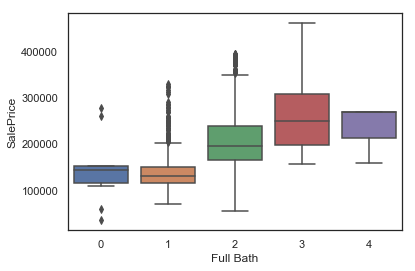

In [67]:
sns.boxplot(x=train['Full Bath'], y=train['SalePrice'])

In [68]:
print(train['Year Remod/Add'].min())
print(train['Year Remod/Add'].max())

1950.0
2010.0


In [69]:
print(test['Year Remod/Add'].min())
print(test['Year Remod/Add'].max())

1950.0
2010.0


In [70]:
train = train.rename(columns={'Year Remod/Add': 'YearRemodAdd'})
test = test.rename(columns={'Year Remod/Add': 'YearRemodAdd'})

In [71]:
train['RemodelYear_Cat'] = 0
train.loc[train.YearRemodAdd <= 1960, 'RemodelYear_Cat'] = 0
train.loc[(train.YearRemodAdd > 1960) & (train.YearRemodAdd <= 1970), 'RemodelYear_Cat'] = 1
train.loc[(train.YearRemodAdd > 1970) & (train.YearRemodAdd <= 1980), 'RemodelYear_Cat'] = 2
train.loc[(train.YearRemodAdd > 1980) & (train.YearRemodAdd <= 1990), 'RemodelYear_Cat'] = 3
train.loc[(train.YearRemodAdd > 1990) & (train.YearRemodAdd <= 2000), 'RemodelYear_Cat'] = 4
train.loc[(train.YearRemodAdd > 2000), 'RemodelYear_Cat'] = 5
train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,YearBuilt_Cat,RemodelYear_Cat
0,60,RL,65.0,8795.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,4,2009.0,WD,Normal,236000.0,2,4
1,20,RL,75.0,10170.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0.0,0.0,0.0,6,2006.0,WD,Normal,155000.0,1,0
2,160,RM,21.0,2001.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1,2007.0,WD,Normal,75000.0,1,1
3,20,RL,70.0,10552.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,4,2010.0,WD,Normal,165500.0,1,0
4,190,RM,60.0,10120.0,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1,2007.0,WD,Normal,122000.0,0,0


In [72]:
test['RemodelYear_Cat'] = 0
test.loc[test.YearRemodAdd <= 1960, 'RemodelYear_Cat'] = 0
test.loc[(test.YearRemodAdd > 1960) & (test.YearRemodAdd <= 1970), 'RemodelYear_Cat'] = 1
test.loc[(test.YearRemodAdd > 1970) & (test.YearRemodAdd <= 1980), 'RemodelYear_Cat'] = 2
test.loc[(test.YearRemodAdd > 1980) & (test.YearRemodAdd <= 1990), 'RemodelYear_Cat'] = 3
test.loc[(test.YearRemodAdd > 1990) & (test.YearRemodAdd <= 2000), 'RemodelYear_Cat'] = 4
test.loc[(test.YearRemodAdd > 2000), 'RemodelYear_Cat'] = 5
test.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,YearBuilt_Cat,RemodelYear_Cat
0,50,RL,66.0,11275.0,Pave,IR1,HLS,AllPub,Corner,Mod,...,0.0,0.0,0.0,0.0,3,2007.0,WD,Normal,1,0
1,20,RL,65.0,9757.0,Pave,Reg,Low,AllPub,Inside,Mod,...,0.0,92.0,0.0,0.0,10,2009.0,WD,Normal,2,4
2,60,RL,86.0,11065.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,10,2006.0,New,Partial,3,5
3,20,RL,70.0,7000.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,4,2007.0,WD,Family,1,5
4,50,C (all),66.0,8712.0,Pave,Reg,HLS,AllPub,Inside,Mod,...,0.0,0.0,0.0,0.0,1,2010.0,WD,Abnorml,0,0


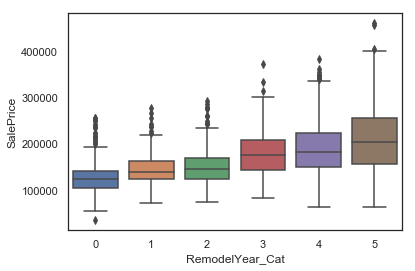

In [73]:
sns.boxplot(x=train['RemodelYear_Cat'], y=train['SalePrice'])

In [74]:
print(train['Garage Yr Blt'].min())
print(train['Garage Yr Blt'].max())
# something is wrong! Garage could not have been built in 2207!

1900.0
2207.0


In [75]:
print(test['Garage Yr Blt'].min())
print(test['Garage Yr Blt'].max())

1895.0
2010.0


In [76]:
# removing garages which are yet to be built
train = train.drop(train[(train['Garage Yr Blt']>2019)].index).reset_index(drop=True)

In [77]:
print(train['Garage Yr Blt'].min())
print(train['Garage Yr Blt'].max())

1900.0
2010.0


In [78]:
train = train.rename(columns={'Garage Yr Blt': 'GarageYrBlt'})
test = test.rename(columns={'Garage Yr Blt': 'GarageYrBlt'})

In [79]:
train['GarageYrBlt_Cat'] = 0
train.loc[train.GarageYrBlt <= 1925,'GarageYrBlt_Cat'] = 0
train.loc[(train.GarageYrBlt > 1925) & (train.GarageYrBlt <= 1955),'GarageYrBlt_Cat'] = 1
train.loc[(train.GarageYrBlt > 1955) & (train.GarageYrBlt <= 1985),'GarageYrBlt_Cat'] = 2
train.loc[(train.GarageYrBlt > 1985) & (train.GarageYrBlt <= 2000),'GarageYrBlt_Cat'] = 3
train.loc[train.GarageYrBlt > 2000,'GarageYrBlt_Cat'] = 4
train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,YearBuilt_Cat,RemodelYear_Cat,GarageYrBlt_Cat
0,60,RL,65.0,8795.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,4,2009.0,WD,Normal,236000.0,2,4,3
1,20,RL,75.0,10170.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0.0,0.0,6,2006.0,WD,Normal,155000.0,1,0,1
2,160,RM,21.0,2001.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,1,2007.0,WD,Normal,75000.0,1,1,2
3,20,RL,70.0,10552.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,4,2010.0,WD,Normal,165500.0,1,0,2
4,190,RM,60.0,10120.0,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0.0,0.0,1,2007.0,WD,Normal,122000.0,0,0,2


In [80]:
test['GarageYrBlt_Cat'] = 0
test.loc[test.GarageYrBlt <= 1925,'GarageYrBlt_Cat'] = 0
test.loc[(test.GarageYrBlt > 1925) & (test.GarageYrBlt <= 1955),'GarageYrBlt_Cat'] = 1
test.loc[(test.GarageYrBlt > 1955) & (test.GarageYrBlt <= 1985),'GarageYrBlt_Cat'] = 2
test.loc[(test.GarageYrBlt > 1985) & (test.GarageYrBlt <= 2000),'GarageYrBlt_Cat'] = 3
test.loc[test.GarageYrBlt > 2000,'GarageYrBlt_Cat'] = 4
test.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,YearBuilt_Cat,RemodelYear_Cat,GarageYrBlt_Cat
0,50,RL,66.0,11275.0,Pave,IR1,HLS,AllPub,Corner,Mod,...,0.0,0.0,0.0,3,2007.0,WD,Normal,1,0,2
1,20,RL,65.0,9757.0,Pave,Reg,Low,AllPub,Inside,Mod,...,92.0,0.0,0.0,10,2009.0,WD,Normal,2,4,3
2,60,RL,86.0,11065.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,10,2006.0,New,Partial,3,5,4
3,20,RL,70.0,7000.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,4,2007.0,WD,Family,1,5,2
4,50,C (all),66.0,8712.0,Pave,Reg,HLS,AllPub,Inside,Mod,...,0.0,0.0,0.0,1,2010.0,WD,Abnorml,0,0,2


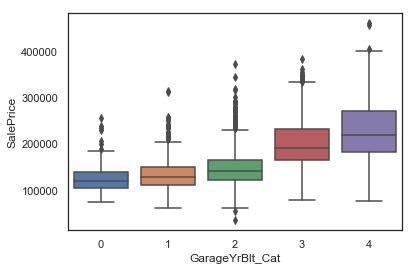

In [81]:
sns.boxplot(x=train['GarageYrBlt_Cat'], y=train['SalePrice'])

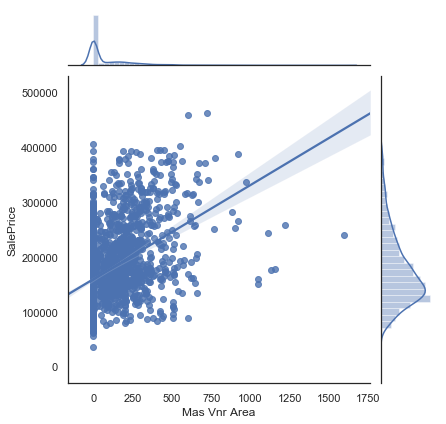

In [82]:
# Mas Vnr Area vs Sale Price
sns.jointplot(x=train['Mas Vnr Area'], y=train['SalePrice'], kind='reg')

In [83]:
# Removing outliers manually 
train = train.drop(train[(train['Mas Vnr Area']>1300) 
                         & (train['SalePrice']<300000)].index).reset_index(drop=True)

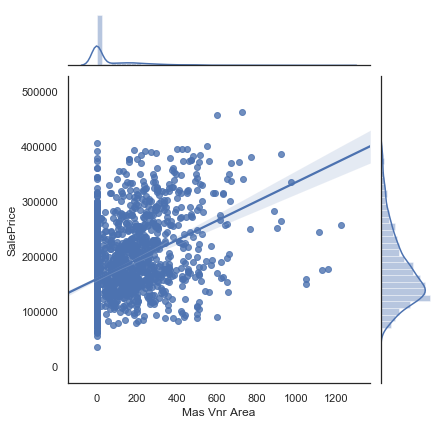

In [84]:
# Mas Vnr Area vs Sale Price
sns.jointplot(x=train['Mas Vnr Area'], y=train['SalePrice'], kind='reg')

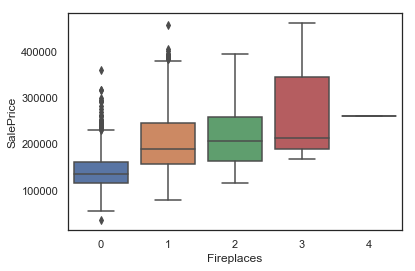

In [85]:
# Fireplaces vs Sale Price
sns.boxplot(x=train['Fireplaces'], y=train['SalePrice'])

In [86]:
train = train.drop(train[(train['Fireplaces'] == 4)].index).reset_index(drop=True)

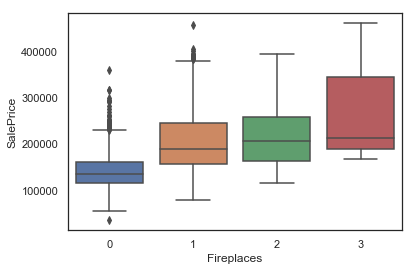

In [87]:
# Fireplaces vs Sale Price
sns.boxplot(x=train['Fireplaces'], y=train['SalePrice'])

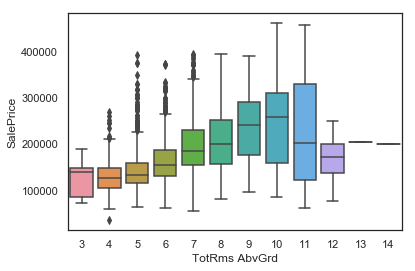

In [88]:
# TotRms AbvGrd vs Sale Price
sns.boxplot(x=train['TotRms AbvGrd'], y=train['SalePrice'])

In [89]:
# Removing outliers manually 
train = train.drop(train[(train['TotRms AbvGrd']>12)].index).reset_index(drop=True)

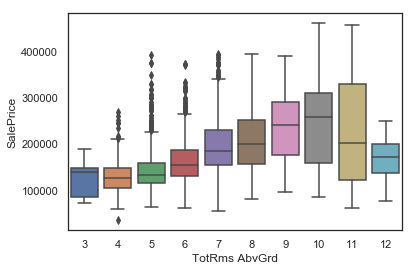

In [90]:
# TotRms AbvGrd vs Sale Price
sns.boxplot(x=train['TotRms AbvGrd'], y=train['SalePrice'])

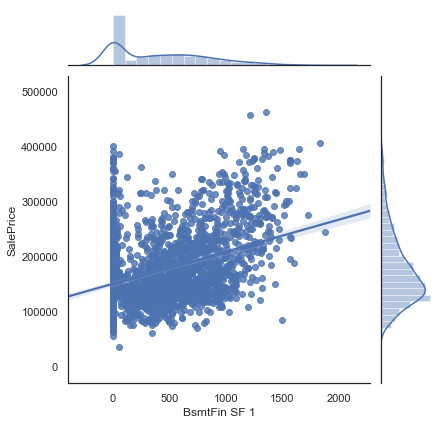

In [91]:
# BsmtFin SF 1 vs Sale Price
sns.jointplot(x=train['BsmtFin SF 1'], y=train['SalePrice'], kind='reg')

# Feature Engineering

In [92]:
# Getting Description
train['SalePrice'].describe()

count      2331.000000
mean     175276.911197
std       64569.492676
min       35311.000000
25%      129500.000000
50%      160000.000000
75%      209850.000000
max      462000.000000
Name: SalePrice, dtype: float64


 mu = 175276.91 and sigma = 64555.64



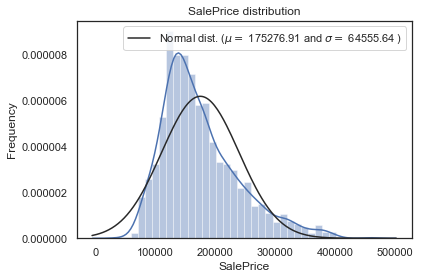

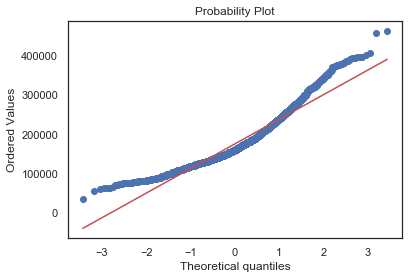

Skewness: 1.052319
Kurtosis: 1.029230


In [93]:
# Plot Histogram
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())


 mu = 12.01 and sigma = 0.35



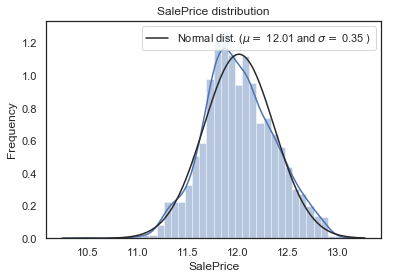

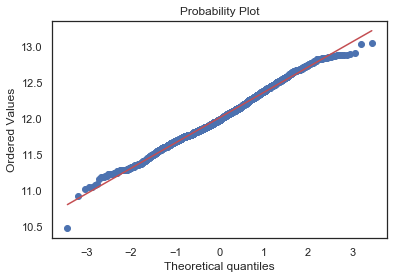

Skewness: 0.126248
Kurtosis: -0.117382


In [94]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

y_train = train.SalePrice.values

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

I will use only the training data for model fitting. So, in the next steps, I will use only the training data for feature encoding, feature engineering etc. The models will be used to predict based on the test data. So, for compatibility, the same feature encoding, feature engineering etc. will be performed on the test data.

In [95]:
from sklearn.model_selection import train_test_split

# Create X, y
X = train.drop('SalePrice', axis=1).values

# Splitting the (training) data into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(X, y_train, test_size=0.25, random_state=0)
# I will fit the model using (X_tr,y_tr) and calculate the MAE based on (y_te,y_te_predicted)

print('Train:', X_tr.shape, y_tr.shape) 
print('Test:', X_te.shape, y_te.shape) 

Train: (1748, 76) (1748,)
Test: (583, 76) (583,)


In [96]:
cols = train.drop('SalePrice', axis=1).columns
X_tr = pd.DataFrame(X_tr,columns=cols)
X_te = pd.DataFrame(X_te,columns=cols)

In [97]:
print(test.shape)
print(X_tr.shape)
print(X_te.shape)

(500, 76)
(1748, 76)
(583, 76)


In [98]:
# some dtypes were changed during train-test split. so rectifying the discrepencies.
test.select_dtypes(include=['int64']).columns

Index(['Overall Qual', 'Overall Cond', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'YearBuilt_Cat', 'RemodelYear_Cat', 'GarageYrBlt_Cat'],
      dtype='object')

In [99]:
for col in ['Overall Qual', 'Overall Cond', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'YearBuilt_Cat', 'RemodelYear_Cat', 'GarageYrBlt_Cat']:
    X_tr[col] = X_tr[col].astype('int64')
    X_te[col] = X_te[col].astype('int64') 

In [100]:
test.select_dtypes(include=['float64']).columns

Index(['Lot Frontage', 'Lot Area', 'YearBuilt', 'YearRemodAdd', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'GarageYrBlt', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Yr Sold'],
      dtype='object')

In [101]:
for col in ['Lot Frontage', 'Lot Area', 'YearBuilt', 'YearRemodAdd', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'GarageYrBlt', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Yr Sold']:
    X_tr[col] = X_tr[col].astype('float64')
    X_te[col] = X_te[col].astype('float64') 

In [102]:
test.select_dtypes(include=['object']).columns

Index(['MS SubClass', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Mo Sold', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [103]:
for col in ['MS SubClass', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Mo Sold', 'Sale Type', 'Sale Condition']:
    X_tr[col] = X_tr[col].astype('object')
    X_te[col] = X_te[col].astype('object')

# Model fitting

First I fit the simple model with the two most correlated features

In [104]:
X_tr_simple = X_tr[['Overall Qual','Total Bsmt SF']]
X_te_simple = X_te[['Overall Qual','Total Bsmt SF']]

In [105]:
# fitting linear regression and computing MAE
reg = LinearRegression().fit(X_tr_simple, y_tr)
pred = np.expm1(reg.predict(X_te_simple))
MAE_simple = np.mean(np.abs(np.expm1(y_te)-pred))
print(MAE_simple)

23604.135661332253


In [106]:
# predicting on the test dataset
X_test_simple = test[['Overall Qual','Total Bsmt SF']]

pred_test = np.expm1(reg.predict(X_test_simple))
sub = pd.DataFrame() #Create a new DataFrame for submission
sub['PID'] = test_PID
sub['SalePrice'] = pred_test
sub.to_csv("simple.csv", index=False) #Convert DataFrame to .csv file

sub #Visualize the DataFrame sub

,PID,SalePrice
0,909279080,155010.518520
1,907126050,133856.843885
2,528144030,236132.053333
3,535452060,134536.923637
4,911202100,108028.340615
5,531382090,151132.066153
6,902477130,77140.485786
7,527402150,160079.951496
8,908102320,151015.756294
9,908276140,96557.806784


Now I fit the intermediate model with the 12 most correlated features

In [107]:
X_tr_intermediate = X_tr[['Overall Qual','Total Bsmt SF','Garage Area','1st Flr SF','YearBuilt_Cat','Full Bath','RemodelYear_Cat','GarageYrBlt_Cat','Mas Vnr Area','Fireplaces','TotRms AbvGrd','BsmtFin SF 1']]
X_te_intermediate = X_te[['Overall Qual','Total Bsmt SF','Garage Area','1st Flr SF','YearBuilt_Cat','Full Bath','RemodelYear_Cat','GarageYrBlt_Cat','Mas Vnr Area','Fireplaces','TotRms AbvGrd','BsmtFin SF 1']]

In [108]:
reg = LinearRegression().fit(X_tr_intermediate, y_tr)
pred = np.expm1(reg.predict(X_te_intermediate))
MAE_intermediate = np.mean(np.abs(np.expm1(y_te)-pred))
print(MAE_intermediate)

17583.73816312652


In [109]:
X_test_intermediate = test[['Overall Qual','Total Bsmt SF','Garage Area','1st Flr SF','YearBuilt_Cat','Full Bath','RemodelYear_Cat','GarageYrBlt_Cat','Mas Vnr Area','Fireplaces','TotRms AbvGrd','BsmtFin SF 1']]

pred_test = np.expm1(reg.predict(X_test_intermediate))
sub = pd.DataFrame() #Create a new DataFrame for submission
sub['PID'] = test_PID
sub['SalePrice'] = pred_test
sub.to_csv("intermediate.csv", index=False) #Convert DataFrame to .csv file

sub #Visualize the DataFrame sub

,PID,SalePrice
0,909279080,149547.360527
1,907126050,138731.765473
2,528144030,258875.228625
3,535452060,133631.131571
4,911202100,100852.494743
5,531382090,156911.047549
6,902477130,73430.957661
7,527402150,137410.798141
8,908102320,153472.972344
9,908276140,98152.703611


Finally I fit the complex model with all the features. Feature encoding for the ordinals are performed using LabelEncoder. I fitted three models: linear regression, ridge regression and lasso and choose the one with the minimum MAE.

In [110]:
# concatenating all the data for feature encoding
all_data = pd.concat((X_tr, X_te, test)).reset_index(drop=True)
print("Combined dataset size is : {}".format(all_data.shape))

Combined dataset size is : (2831, 76)


In [111]:
from sklearn.preprocessing import LabelEncoder

ordinal_values = ['Lot Shape','Land Slope','Exter Qual','Exter Cond','Bsmt Qual',
           'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual',
            'Functional','Fireplace Qu','Garage Finish','Garage Qual','Garage Cond','Paved Drive']

for ordinal in ordinal_values:
    le = LabelEncoder()
    le.fit(all_data[ordinal])
    all_data[ordinal] = le.transform(all_data[ordinal])
    
print(all_data.shape)

(2831, 76)


In [112]:
#Adding Total Square Feet feature 
all_data['Total SF'] = all_data['Total Bsmt SF'] + all_data['1st Flr SF'] + all_data['2nd Flr SF']

In [113]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Checking the skewness of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

,Skewed Features
Misc Val,22.028004
Pool Area,19.325321
Low Qual Fin SF,12.671603
3Ssn Porch,11.199395
Lot Area,10.927746


In [114]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)
    all_data[feat] += 1

There are 54 skewed numerical features to Box Cox transform


In [115]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2831, 248)


In [116]:
# Split the combined dataset 
n1 = X_tr.shape[0]
n2 = X_te.shape[0]
X_tr = all_data[:n1]
X_te = all_data[n1:(n1+n2)]
X_test = all_data[(n1+n2):]
print(X_tr.shape)
print(X_te.shape)
print(X_test.shape)

(1748, 248)
(583, 248)
(500, 248)


In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

Linear regression model

In [118]:
reg = LinearRegression().fit(X_tr, y_tr)
pred = np.expm1(reg.predict(X_test))
MAE_lr = MAE(np.expm1(y_te),np.expm1(reg.predict(X_te)))
print(MAE_lr)

12511.832648252075


In [119]:
# Standardizing the data
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_te_rescaled = scaler.transform(X_te)
X_test_rescaled = scaler.transform(X_test)

Here I am fitting Ridge regression and finding the regularization parameter using grid search.

In [120]:
gs_results = []
for run_idx in range(50):
    # Split into train/test sets
    X_tr2, X_te2, y_tr2, y_te2 = train_test_split(
        X_tr_rescaled, y_tr, test_size=0.25, random_state=run_idx)

    # Grid search
    for alpha in np.logspace(1, 4, num=100):
        # Create and fit ridge regression
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_tr2, y_tr2)

        # Save model and its performance on train/test sets
        gs_results.append({
            'model': ridge,
            'alpha': alpha,
            'run_idx': run_idx,
            'train_mse': MSE(y_tr2, ridge.predict(X_tr2)),
            'train_mae': MAE(np.expm1(y_tr2), np.expm1(ridge.predict(X_tr2))),
            'test_mse': MSE(y_te2, ridge.predict(X_te2)),
            'test_mae': MAE(np.expm1(y_te2), np.expm1(ridge.predict(X_te2))),
        })

# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.head()

,alpha,model,run_idx,test_mae,test_mse,train_mae,train_mse
0,10.000000,"Ridge(alpha=10.0, copy_X=True, fit_intercept=T...",0,13368.494549,0.011001,10840.202101,0.007822
1,10.722672,"Ridge(alpha=10.722672220103231, copy_X=True, f...",0,13365.243996,0.010993,10842.481940,0.007824
2,11.497570,"Ridge(alpha=11.497569953977356, copy_X=True, f...",0,13361.781139,0.010984,10845.138113,0.007827
3,12.328467,"Ridge(alpha=12.32846739442066, copy_X=True, fi...",0,13358.093676,0.010975,10847.941419,0.007830
4,13.219411,"Ridge(alpha=13.219411484660288, copy_X=True, f...",0,13354.168663,0.010966,10851.054619,0.007833


In [121]:
# Group results by alpha value
gb_alpha = gs_results.groupby('alpha')

# Compute train/test mean scores with std
mean_tr = gb_alpha.train_mse.mean()
mean_te = gb_alpha.test_mse.mean()
std_tr = gb_alpha.train_mse.std()
std_te = gb_alpha.test_mse.std()
alphas = mean_tr.index.values

# Get entry with the best mean test MSE
best_alpha = mean_te.idxmin()
best_result = gb_alpha.get_group(best_alpha)

# Print the details
print('Best alpha: {:.1e}'.format(best_alpha)) 
print('Test MSE: {:.4f}'.format(best_result.test_mse.mean()))
print('Test MAE: {:,.0f}'.format(best_result.test_mae.mean()))

Best alpha: 1.6e+02
Test MSE: 0.0117
Test MAE: 13,279


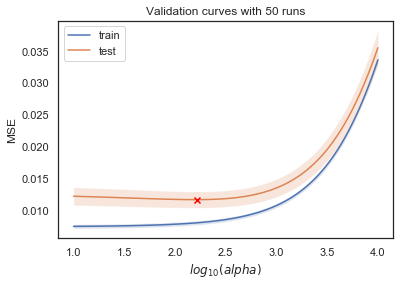

In [122]:
# Plot mean scores
plt.plot(np.log10(alphas), mean_tr, label='train')
plt.plot(np.log10(alphas), mean_te, label='test')

# Quantify variance with ±std curves
plt.fill_between(np.log10(alphas), mean_tr-std_tr, mean_tr+std_tr, alpha=0.2)
plt.fill_between(np.log10(alphas), mean_te-std_te, mean_te+std_te, alpha=0.2)

# Add marker for best score
plt.scatter(np.log10(best_alpha), mean_te.min(), marker='x', c='red', zorder=10)

plt.title('Validation curves with {} runs'.format(len(gs_results.groupby('run_idx'))))
plt.xlabel('$log_{10}(alpha)$')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [123]:
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_tr, y_tr)
MAE_ridge1 = MAE(np.expm1(y_te),np.expm1(ridge.predict(X_te)))
print(MAE_ridge1)

13822.168599526989


Lasso with grid search.

In [124]:
gs_results = []
for run_idx in range(50):
    # Split into train/test sets
    X_tr2, X_te2, y_tr2, y_te2 = train_test_split(
        X_tr_rescaled, y_tr, test_size=0.25, random_state=run_idx)

    # Grid search
    for alpha in np.logspace(-4, -1, num=100):
        # Create and fit lasso regression
        lasso = Lasso(alpha=alpha, max_iter=1e5)
        lasso.fit(X_tr2, y_tr2)

        # Save model and its performance on train/test sets
        gs_results.append({
            'model': ridge,
            'alpha': alpha,
            'run_idx': run_idx,
            'train_mse': MSE(y_tr2, lasso.predict(X_tr2)),
            'train_mae': MAE(np.expm1(y_tr2), np.expm1(lasso.predict(X_tr2))),
            'test_mse': MSE(y_te2, lasso.predict(X_te2)),
            'test_mae': MAE(np.expm1(y_te2), np.expm1(lasso.predict(X_te2))),
        })

# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.head()

,alpha,model,run_idx,test_mae,test_mse,train_mae,train_mse
0,0.000100,"Ridge(alpha=162.97508346206433, copy_X=True, f...",0,13275.303408,0.010867,10835.566761,0.007813
1,0.000107,"Ridge(alpha=162.97508346206433, copy_X=True, f...",0,13263.063172,0.010847,10837.898068,0.007815
2,0.000115,"Ridge(alpha=162.97508346206433, copy_X=True, f...",0,13249.937796,0.010825,10840.479238,0.007817
3,0.000123,"Ridge(alpha=162.97508346206433, copy_X=True, f...",0,13236.048773,0.010802,10843.667414,0.007820
4,0.000132,"Ridge(alpha=162.97508346206433, copy_X=True, f...",0,13221.277609,0.010778,10847.361034,0.007822


In [125]:
# Group results by alpha value
gb_alpha = gs_results.groupby('alpha')

# Compute train/test mean scores with std
mean_tr = gb_alpha.train_mse.mean()
mean_te = gb_alpha.test_mse.mean()
std_tr = gb_alpha.train_mse.std()
std_te = gb_alpha.test_mse.std()
alphas = mean_tr.index.values

# Get entry with the best mean test MSE
best_alpha = mean_te.idxmin()
best_result = gb_alpha.get_group(best_alpha)

# Print the details
print('Best alpha: {:.1e}'.format(best_alpha)) 
print('Test MSE: {:.4f}'.format(best_result.test_mse.mean()))
print('Test MAE: {:,.0f}'.format(best_result.test_mae.mean()))

Best alpha: 2.2e-03
Test MSE: 0.0110
Test MAE: 12,952


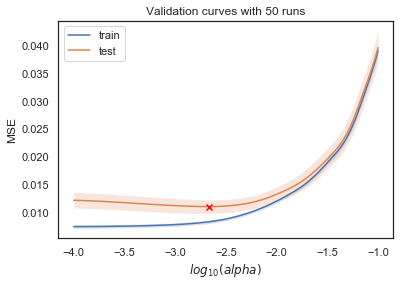

In [126]:
# Plot mean scores
plt.plot(np.log10(alphas), mean_tr, label='train')
plt.plot(np.log10(alphas), mean_te, label='test')

# Quantify variance with ±std curves
plt.fill_between(np.log10(alphas), mean_tr-std_tr, mean_tr+std_tr, alpha=0.2)
plt.fill_between(np.log10(alphas), mean_te-std_te, mean_te+std_te, alpha=0.2)

# Add marker for best score
plt.scatter(np.log10(best_alpha), mean_te.min(), marker='x', c='red', zorder=10)

plt.title('Validation curves with {} runs'.format(len(gs_results.groupby('run_idx'))))
plt.xlabel('$log_{10}(alpha)$')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [127]:
lasso = Lasso(alpha=best_alpha,max_iter=1e5)
lasso.fit(X_tr, y_tr)
MAE_lasso1 = MAE(np.expm1(y_te),np.expm1(lasso.predict(X_te)))
print(MAE_lasso1)

13081.558587450505


Now doing the same thing with pipeline

In [128]:
from sklearn.pipeline import make_pipeline
alpha_lasso = np.logspace(-4, -1, 100)


lasso_model = make_pipeline(RobustScaler(),
                             LassoCV(max_iter=1e5,
                                    alphas = alpha_lasso,
                                    cv = 50)).fit(X_tr, y_tr)

MAE_lasso2 = MAE(np.expm1(y_te),np.expm1(lasso_model.predict(X_te)))
print(MAE_lasso2)    

11863.666714444005


In [129]:
# and for ridge regression
alpha_ridge = np.logspace(1, 4, 100)

ridge_model = make_pipeline(RobustScaler(), RidgeCV(alphas = alpha_ridge, cv=50)).fit(X_tr, y_tr)

MAE_ridge2 = MAE(np.expm1(y_te),np.expm1(ridge_model.predict(X_te)))
print(MAE_ridge2)

11878.983847321064


In [130]:
# I choose Lasso model with pipeline because it has the lowest MAE score
# the Ridge model with pipeline has a almost similar MAE score

pred_test = np.expm1(lasso_model.predict(X_test))
sub = pd.DataFrame() #Create a new DataFrame for submission
sub['PID'] = test_PID
sub['SalePrice'] = pred_test
sub.to_csv("complex.csv", index=False) #Convert DataFrame to .csv file

sub #Visualize the DataFrame sub

,PID,SalePrice
0,909279080,197150.171500
1,907126050,155774.226309
2,528144030,277880.703158
3,535452060,126901.071236
4,911202100,104858.293709
5,531382090,172190.180123
6,902477130,48323.958479
7,527402150,135389.631912
8,908102320,158123.012540
9,908276140,101437.749514


In [131]:
# baseline (median) MAE
Base_MAE = np.mean(np.abs(np.expm1(y_te)-np.expm1(np.median(y_tr))))
print(Base_MAE)

48604.20240137221


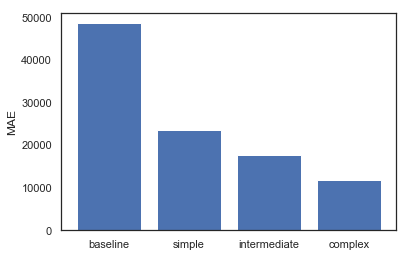

In [132]:
# Bar plot of the MAEs
mae_values = [Base_MAE, MAE_simple, MAE_intermediate, MAE_lasso2]
titles = ['baseline', 'simple', 'intermediate', 'complex']

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)

plt.ylabel('MAE')
plt.show()